# Investigation into the effects of Prototype ordering

A cycamore::ManagerInst is used to deploy reactors in order to meet a flat demand for 
energy -- 91.18 GWe-yr. It was observed that the order the prototypes were listed 
in the institution affects the number of each prototype built, with preferential 
building of prototypes listed first. This notebook looks at the results of each 
possible combination of prototype ordering. The prototypes in question are: Xe-100, MMR, 
and VOYGR. The scenarios modeled are defined as:
* 1: Xe-100, VOYGR, MMR
* 2: Xe-100, MMR, VOYGR
* 3: VOYGR, Xe-100, MMR
* 4: VOYGR, MMR, Xe-100
* 5: MMR, VOYGR, Xe-100
* 6: MMR, Xe-100, VOYGR

Each of these scenarios was run twice: with all prototypes deployed by the same institution (s#), and with each prototype deployed by a different institution (m#). In both cases, the cycamore::ManagerInst is used to deploy the prototypes. 

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cymetric as cym
sys.path.insert(0, '../../../scripts/')
import transition_metrics as tm

In [4]:
def get_prototype_numbers(out_file, prototypes):
    '''
    This function get the Agents metrics for 
    a give output file and get the length of that
    dataframe for each specified prototype
    
    Parameters:
    -----------
    out_file: str
        name of output file to read
    prototypes: list, str
        list of strings of the name(s) of prototypes
        
    Returns:
    --------
    prototype_numbers: dict
        dictionary of the number of prototypes deployed, the 
        prototype name are the keys of the dictionary
    '''
    evaler = tm.get_metrics(out_file)
    agents = evaler.eval('Agents')
    prototype_numbers = {}
    prototype_numbers['total'] = 0
    for prototype in prototypes:
        prototype_agents = agents.loc[agents['Prototype'] == prototype]
        prototype_numbers[prototype] = len(prototype_agents)
        prototype_numbers['total'] += prototype_numbers[prototype]
    return prototype_numbers

In [5]:
out_files = {'s1_out':'s1_output.sqlite', 's2_out':'s2_output.sqlite', 
            's3_out':'s3_output.sqlite', 's4_out':'s4_output.sqlite',
            's5_out':'s5_output.sqlite', 's6_out':'s6_output.sqlite',
            'm1_out':'s1_multiple.sqlite', 'm2_out':'s2_multiple.sqlite',
            'm3_out':'s3_multiple.sqlite', 'm4_out':'s4_multiple.sqlite',
            'm5_out':'s5_multiple.sqlite', 'm6_out':'s6_multiple.sqlite',
            }
reactor_numbers = {'s1_reactors':'', 's2_reactors':'', 's3_reactors':'',
            's4_reactors':'', 's5_reactors':'', 's6_reactors':'',
            'm1_reactors':'', 'm2_reactors':'', 'm3_reactors':'',
            'm4_reactors':'', 'm5_reactors':'', 'm6_reactors':''}
reactor_totals = {'s1_reactors':'', 's2_reactors':'', 's3_reactors':'',
            's4_reactors':'', 's5_reactors':'', 's6_reactors':'',
            'm1_reactors':'', 'm2_reactors':'', 'm3_reactors':'',
            'm4_reactors':'', 'm5_reactors':'', 'm6_reactors':''}

non_lwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'Xe-100', 'MMR', 'VOYGR', 'VOYGR_Inst', 'MMR_Inst', 'Xe_Inst']

prototypes = ['MMR', 'VOYGR', 'Xe-100']
for key in out_files:
    scenario_reactors = key[:2] + '_reactors'
    reactor_numbers[scenario_reactors] = get_prototype_numbers(out_files[key], prototypes)
    reactor_totals[scenario_reactors] = tm.get_prototype_totals(out_files[key], non_lwr, prototypes)

In [6]:
reactor_numbers

{'s1_reactors': {'total': 2033, 'MMR': 722, 'VOYGR': 516, 'Xe-100': 795},
 's2_reactors': {'total': 1913, 'MMR': 782, 'VOYGR': 0, 'Xe-100': 1131},
 's3_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 's4_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 's5_reactors': {'total': 7347, 'MMR': 7101, 'VOYGR': 0, 'Xe-100': 246},
 's6_reactors': {'total': 7347, 'MMR': 7101, 'VOYGR': 0, 'Xe-100': 246},
 'm1_reactors': {'total': 1788, 'MMR': 686, 'VOYGR': 2, 'Xe-100': 1100},
 'm2_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 'm3_reactors': {'total': 1894, 'MMR': 686, 'VOYGR': 320, 'Xe-100': 888},
 'm4_reactors': {'total': 1788, 'MMR': 686, 'VOYGR': 2, 'Xe-100': 1100},
 'm5_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 'm6_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112}}

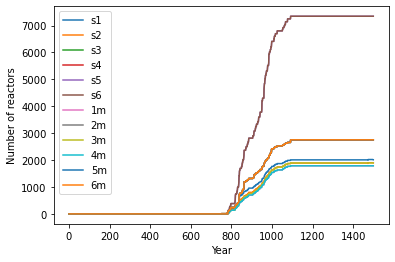

In [4]:
for key in reactor_totals:
    plt.plot(reactor_totals[key]['Time'], reactor_totals[key]['advrx_total'], label=key[:2])
plt.xlabel('Year')
plt.ylabel('Number of reactors')
plt.legend()
plt.savefig('reactor_totals.png')

In [7]:
energy = {'s1_energy':'', 's2_energy':'', 's3_energy':'',
          's4_energy':'', 's5_energy':'', 's6_energy':'',
          'm1_energy':'', 'm2_energy':'', 'm3_energy':'',
          'm4_energy':'', 'm5_energy':'', 'm6_energy':''}
for key in out_files:
    energy_key = key[:2] + '_energy'
    energy[energy_key]= {}
    energy[energy_key]['Annual'] = tm.get_annual_electricity(out_files[key])
    energy[energy_key]['Monthly'] = tm.get_monthly_electricity(out_files[key])

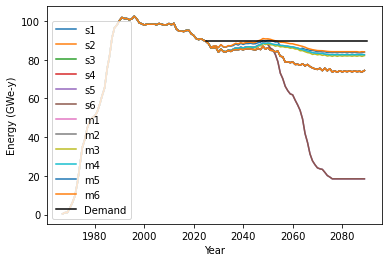

In [8]:
for key in energy:
    plt.plot(energy[key]['Annual']['Year'], energy[key]['Annual']['Energy'], label=key[:2])
time = np.linspace(2025, 2090, 50)
plt.plot(time, np.repeat(89.456, 50), 'k', label='Demand')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('annual_energy.png')

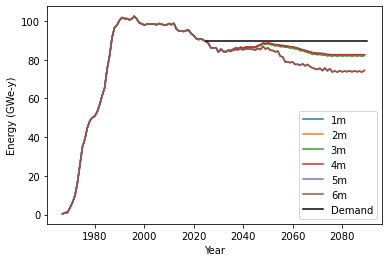

In [7]:
#Just looking at output from cases with multiple ManagerInsts
for key in ['1m_energy','2m_energy','3m_energy', '4m_energy', '5m_energy', '6m_energy']:
    plt.plot(energy[key]['Annual']['Year'], energy[key]['Annual']['Energy'], label=key[:2])
time = np.linspace(2025, 2090, 50)
plt.plot(time, np.repeat(89.456, 50), 'k', label='Demand')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('annual_energy_multipleMI.png')   

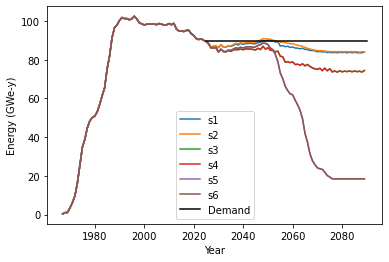

In [9]:
#Just lookign at output from cases with one ManagerInsts
for key in ['s1_energy','s2_energy','s3_energy', 's4_energy', 's5_energy', 's6_energy']:
    plt.plot(energy[key]['Annual']['Year'], energy[key]['Annual']['Energy'], label=key[:2])
time = np.linspace(2025, 2090, 50)
plt.plot(time, np.repeat(89.456, 50), 'k', label='Demand')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('annual_energy_singleMI.png')

## Conclusions
This analysis demonstrated that the ordering of the prototypes in the input file does impact the number of each prototype that are deployed, as well as the energy supplied in the scenario. Any ordering of the prototypes results in the demand not being fully met for the scenario. 

Using multiple institutions reduces the variability caused by the ordering of the prototypes, but does not remove it entirely. Using multiple institutions also does not result in the energy demand being met for the entire scenario.